<a href="https://colab.research.google.com/gist/KhawajaMuddassar/e62f28004a6339feae1b331ac8156ea5/variational-autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Variational Autoencoders:**
A **Variational Autoencoder (VAE)** is a type of generative model that learns to encode data into a latent space and generate new, similar data by sampling from that latent space. Unlike a traditional autoencoder, which learns deterministic representations of data, a VAE learns a probabilistic mapping from the data to the latent space. It aims to model the data distribution in a way that allows for the generation of new, realistic samples, making it a powerful tool for tasks like image generation, data synthesis.

In a VAE, instead of directly mapping inputs to a single point in the latent space, the encoder maps the input to a distribution (usually a Gaussian distribution) characterized by a mean and variance. The decoder then reconstructs the data by sampling from this distribution.

**How Does a VAE Work?**
Let's say, We design the network so that a random vector, generated from a predefined distribution, can create a realistic image. This wasn't possible with a simple autoencoder because it didn’t consider the distribution of the data that generates the image. In a Variational Autoencoder (VAE), we make this possible using the following approach:

* The encoder produces two vectors for each image:

         One vector represents the mean of the data.
         The other represents the standard deviation (or spread) of the data.
* From these two vectors, we create a modified vector by adding the mean to the standard deviation (which is multiplied by a small random number). This modified vector has the same size as the original vectors.

* The modified vector is then passed to the decoder, which reconstructs the image from it.

* The loss we aim to minimize is a combination of:

         KL divergence loss: This measures how much the distribution of the mean and standard deviation vectors deviate from expected values (0 and 1).
         Mean squared loss: This helps optimize the reconstruction of the mage, ensuring the decoder produces a realistic output.

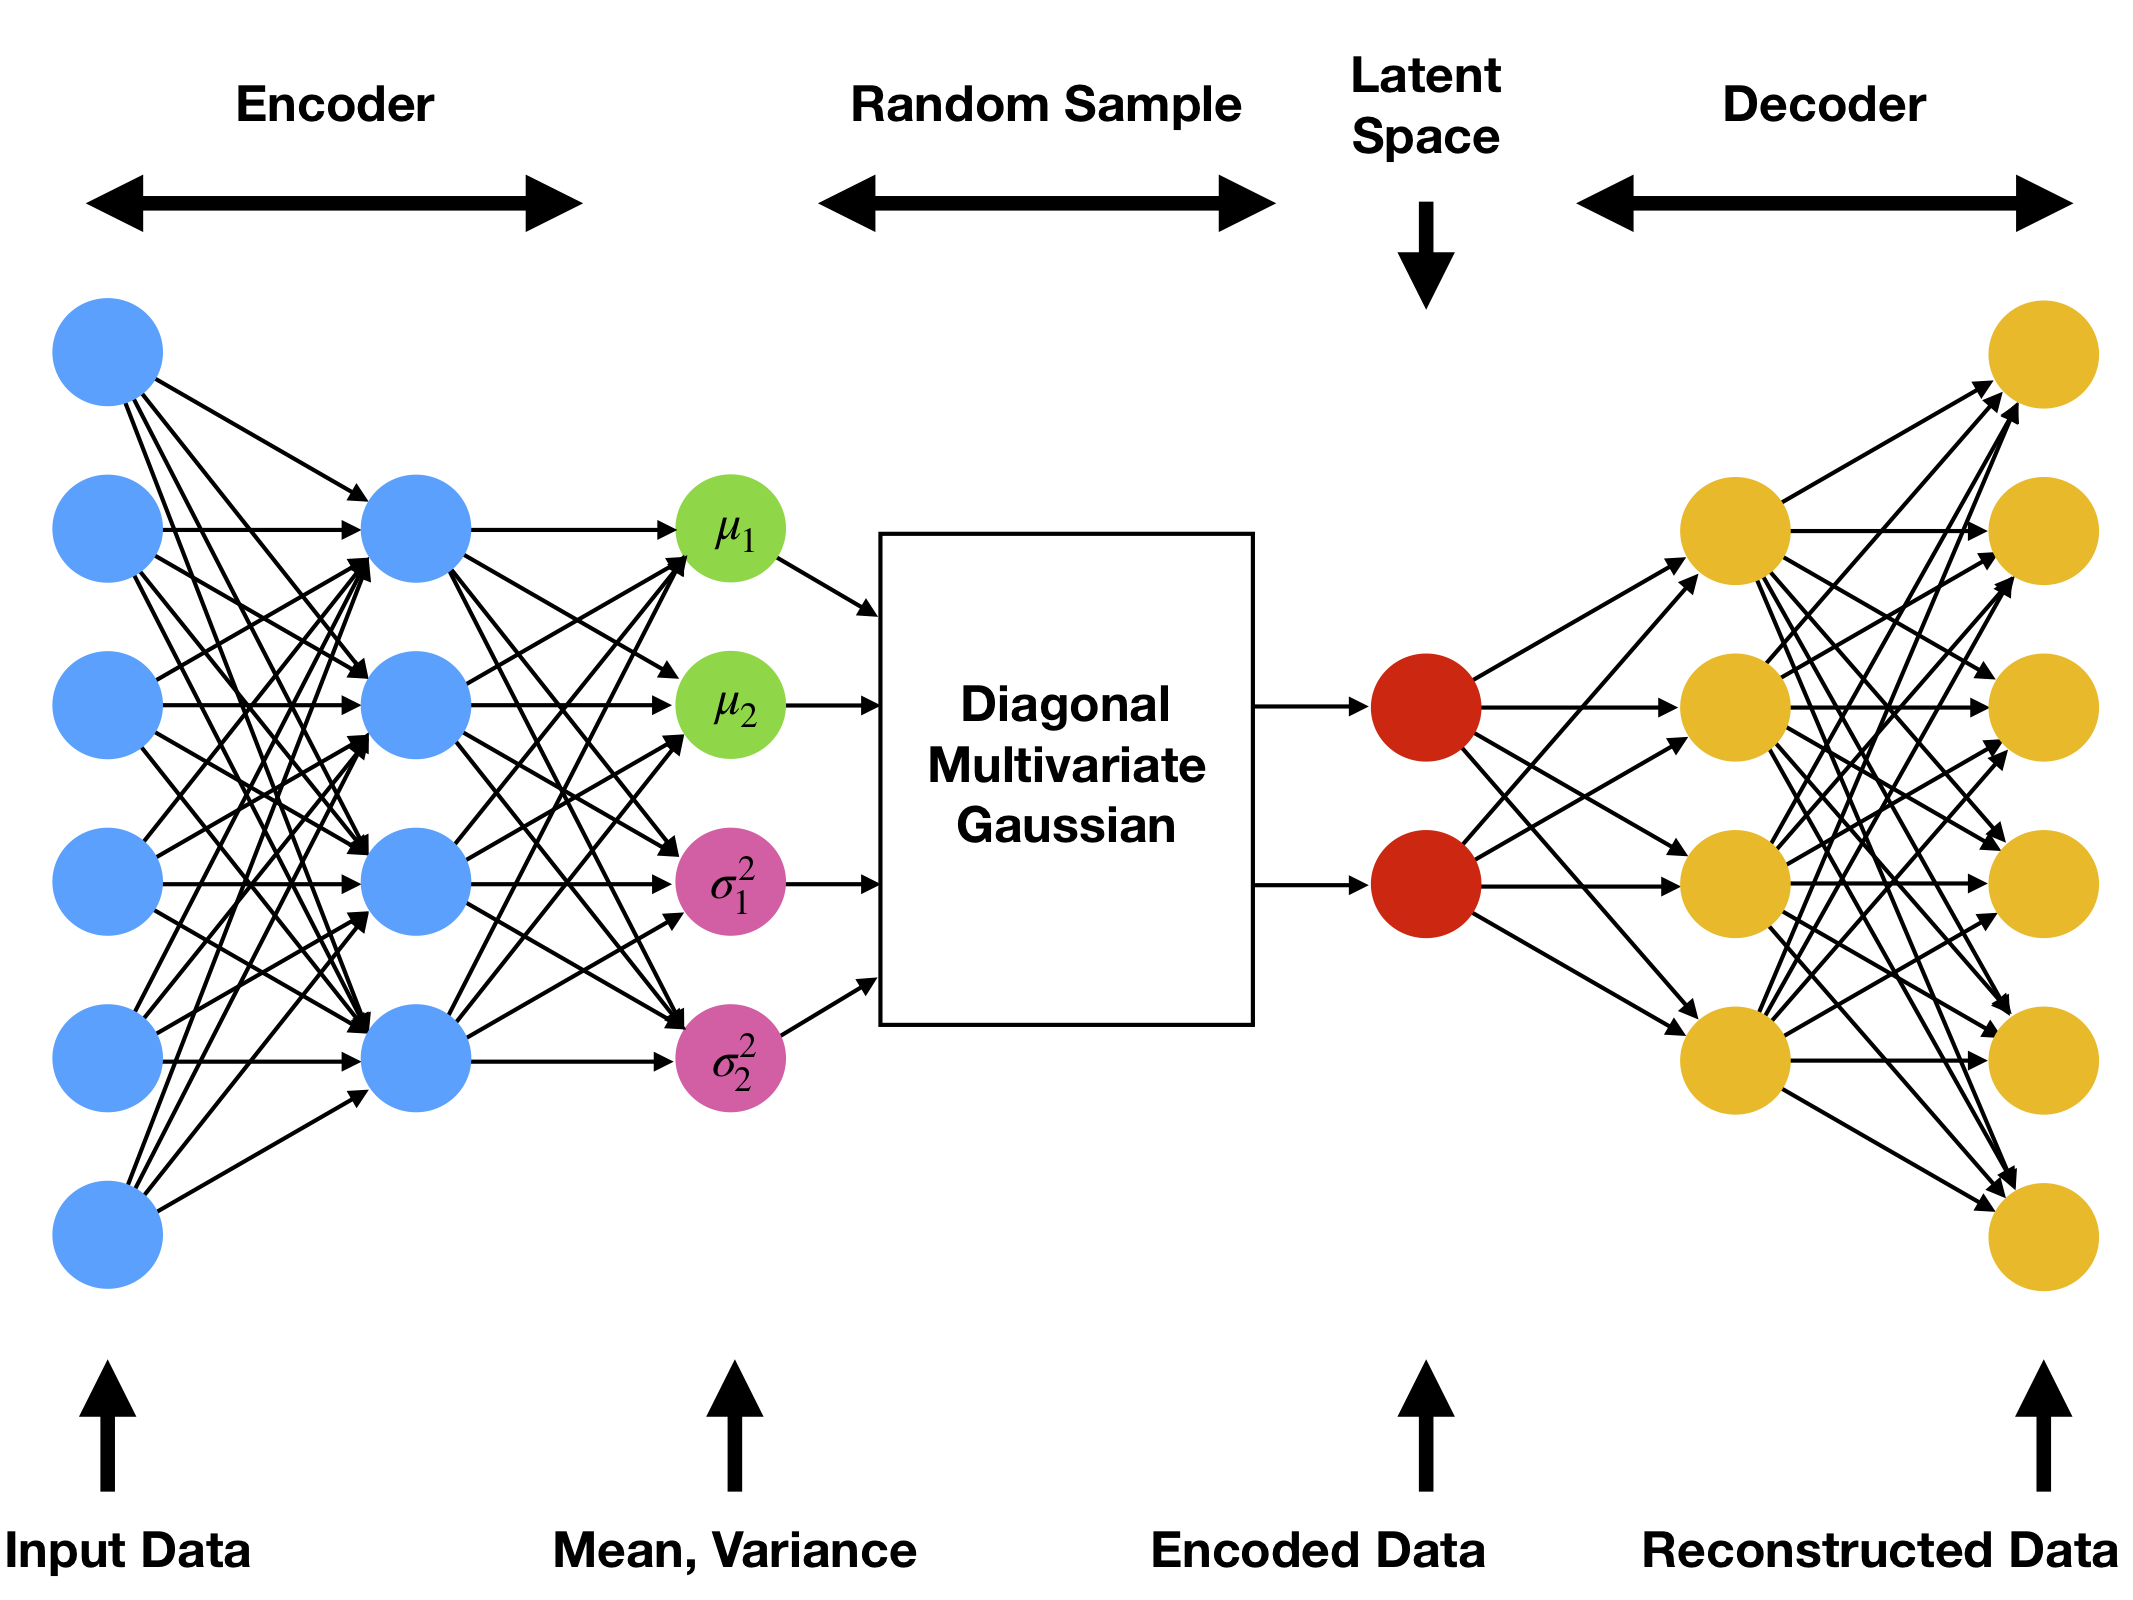


* **Encoder:** Turns the input data into a probability distribution (mean and variance).
* **Latent Space:** A "compressed" version of the data that holds a distribution of possibilities.
* **Reparameterization Trick/ Sampling:** A technique that allows the model to sample from the distribution in a way that is easy to train.
* **Decoder:** Reconstructs the input data using a sample from the latent space.
* **Loss Function:** Combines reconstruction loss (how well we rebuild the data) and KL divergence loss (how well we fit the distribution).

# **Building a basic VAE**

In [ ]:
!pip install -q --upgrade torch_snippets
!pip install -q torchsummary
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch_snippets import *
from torch_snippets.torch_loader import DataLoader, Report
device = 'cuda' if torch.cuda.is_available() else 'cpu'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.7/218.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.0/99.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 kB 31.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 79.6 MB/s eta 0:00:00


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 17.5MB/s]


Extracting /content/CIFAR10/MNIST/raw/train-images-idx3-ubyte.gz to /content/CIFAR10/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 567kB/s]


Extracting /content/CIFAR10/MNIST/raw/train-labels-idx1-ubyte.gz to /content/CIFAR10/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 2.79MB/s]


Extracting /content/CIFAR10/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/CIFAR10/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.07MB/s]


Extracting /content/CIFAR10/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/CIFAR10/MNIST/raw

EPOCH: 1.000  train_mean: -0.000  val_mean: 0.004  val_log_var: -0.245  train_kld: 245.104  train_log_var: -0.149  val_recon: 2036.716  val_loss: 2456.613  train_recon: 2685.974  train_loss: 2931.077  val_kld: 419.897  (49.46s - 197.85s remaining)


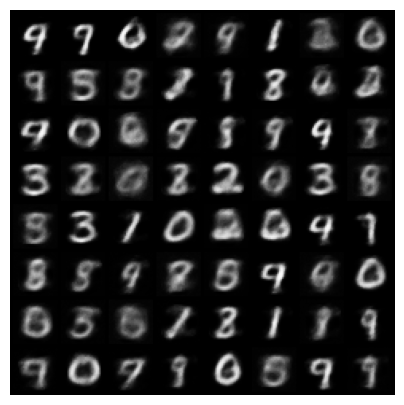

EPOCH: 2.000  train_mean: -0.001  val_mean: -0.001  val_log_var: -0.326  train_kld: 478.203  train_log_var: -0.291  val_recon: 1609.153  val_loss: 2141.733  train_recon: 1783.531  train_loss: 2261.733  val_kld: 532.580  (104.38s - 156.57s remaining)


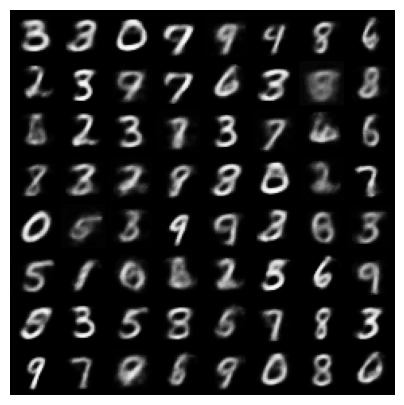

EPOCH: 3.000  train_mean: -0.002  val_mean: -0.001  val_log_var: -0.344  train_kld: 538.774  train_log_var: -0.331  val_recon: 1461.100  val_loss: 2014.273  train_recon: 1540.214  train_loss: 2078.988  val_kld: 553.172  (158.75s - 105.83s remaining)


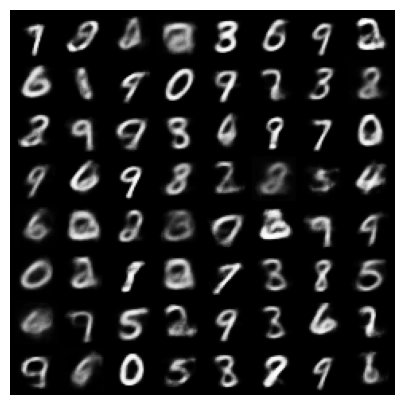

EPOCH: 4.000  train_mean: -0.002  val_mean: -0.002  val_log_var: -0.357  train_kld: 570.531  train_log_var: -0.352  val_recon: 1391.973  val_loss: 1966.789  train_recon: 1429.648  train_loss: 2000.179  val_kld: 574.816  (213.84s - 53.46s remaining)


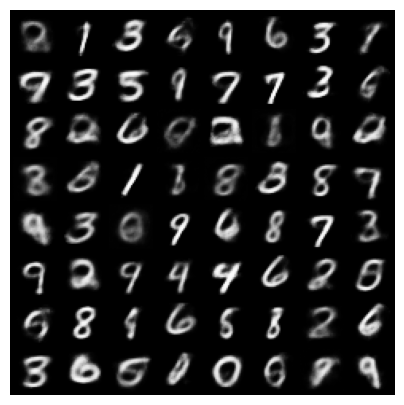

EPOCH: 5.000  train_mean: -0.001  val_mean: 0.002  val_log_var: -0.363  train_kld: 584.688  train_log_var: -0.363  val_recon: 1347.674  val_loss: 1939.749  train_recon: 1372.938  train_loss: 1957.626  val_kld: 592.076  (269.01s - 0.00s remaining)


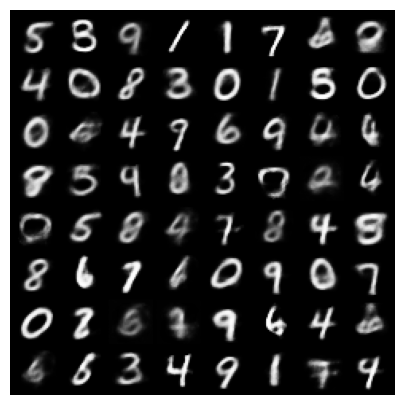

In [ ]:
class transformer:
    def __init__(self, batch_size=64):
        self.batch_size = batch_size
    def __call__(self, img):
        image_transform = transforms.Compose([
            transforms.ToTensor()])
        return image_transform(img)

    def TrainValidateSets(self):
        self.train_ds = datasets.MNIST(root='/content/CIFAR10/',train=True, transform=self, download=True)
        self.val_ds = datasets.MNIST(root='/content/CIFAR10/', train=True, transform=self, download=True)
        return self.train_ds, self.val_ds
    def DataLoaders(self):
        self.train_dl = DataLoader(dataset=self.train_ds, batch_size=self.batch_size, shuffle=True)
        self.val_dl = DataLoader(dataset=self.val_ds, batch_size=self.batch_size, shuffle=False)
        return self.train_dl, self.val_dl

class VAE(nn.Module):
    def __init__(self, x_dim, h_dim1, h_dim2, z_dim):
        super(VAE,self).__init__()
        # Encoder
        self.d1 = nn.Linear(x_dim, h_dim1)
        self.d2 = nn.Linear(h_dim1, h_dim2)
        self.d31 = nn.Linear(h_dim2, z_dim)  # Mean
        self.d32 = nn.Linear(h_dim2, z_dim)  # Std (log variance)

        # Decoder
        self.d4 = nn.Linear(z_dim, h_dim2)   # Map from z_dim to h_dim2
        self.d5 = nn.Linear(h_dim2, h_dim1)  # Decoder layer 1
        self.d6 = nn.Linear(h_dim1, x_dim)

    def Encoder(self,x):
        h = F.relu(self.d1(x))
        h = F.relu(self.d2(h))
        return self.d31(h), self.d32(h)
    def Sampling(self, mean, log_var):
        std = torch.exp(0.5*log_var)
        eps = torch.randn_like(std)
        return eps.mul(std).add_(mean) #with some normal distribution noise
    def decoder(self, z):
        h = F.relu(self.d4(z))
        h = F.relu(self.d5(h))
        return torch.sigmoid(self.d6(h))  # Final layer to reconstruct the image
    def forward(self,x):
        mean, log_var = self.Encoder(x.view(-1, 784))
        z = self.Sampling(mean, log_var)
        return self.decoder(z), mean, log_var

class TrainModel:
    def __init__(self, train_dl, val_dl, epochs=5):
        self.train_dl = train_dl
        self.val_dl = val_dl
        self.epochs = epochs
        self.device = 'cuda' if torch.cuda.is_available() else 'cpu'

    def LossFunction(self, recon_x, x, mean, log_var):
        recon = F.mse_loss(recon_x, x.view(-1, 784), reduction='sum')
        KLD = -0.5 * torch.sum(1 + log_var - mean.pow(2) - log_var.exp()) # "log_var.exp()= variance value"
        return recon + KLD, recon, KLD

    def TrainBatch(self, input):
        self.model.train()
        input = input.to(device)
        self.optimizer.zero_grad()
        recon_batch, mean, log_var = self.model(input)
        loss, mse, kld = self.LossFunction(recon_batch, input, mean, log_var)
        loss.backward()
        self.optimizer.step()
        return loss, mse, kld, log_var.mean(), mean.mean()

    @torch.no_grad()
    def ValidateBatch(self, input):
        self.model.eval()
        input = input.to(device)
        recon, mean, log_var = self.model(input)
        loss, mse, kld = self.LossFunction(recon, input, mean, log_var)
        return loss, mse, kld, log_var.mean(), mean.mean()

    def ModelTrainer(self):
        self.model = VAE(x_dim=784, h_dim1=512, h_dim2=256, z_dim=50).to(device)
        self.optimizer = optim.AdamW(self.model.parameters(), lr=1e-3)

        log = Report(self.epochs)

        for epoch in range(self.epochs):
            N = len(self.train_dl)
            for batch_idx, (data, _) in enumerate(self.train_dl):
                loss, recon, kld, log_var, mean = self.TrainBatch(data)
                pos = epoch + (1+batch_idx)/N
                log.record(pos, train_loss=loss, train_kld=kld, train_recon=recon, train_log_var=log_var, train_mean=mean, end='\r')

            N = len(self.val_dl)
            for batch_idx, (data, _) in enumerate(self.val_dl):
                loss, recon, kld, log_var, mean = self.ValidateBatch(data)
                pos = epoch + (1+batch_idx)/N
                log.record(pos, val_loss=loss, val_kld=kld, val_recon=recon, val_log_var=log_var, val_mean=mean, end='\r')

            log.report_avgs(epoch+1)
            with torch.no_grad():
                z = torch.randn(64, 50).to(device)
                sample = self.model.decoder(z).to(device)
                images = make_grid(sample.view(64, 1, 28, 28)).permute(1,2,0)
                show(images)

if __name__ == '__main__':
    # Download and prepare
    prepare_data = transformer()

    # datset
    train_ds,val_ds = prepare_data.TrainValidateSets()

    # Train and Validate Loaders
    train_dl, val_dl = prepare_data.DataLoaders()

    #Initialize Training
    trainer = TrainModel(train_dl,val_dl)
    trainer.ModelTrainer()

We can see that we are able to generate realistic new images that were not present in the original image